## Airbnb assignment [1-11] 2014100518 송기훈

### Question4

#### Graph: draw each graph by the following lists

1) line plot<br> x axis = ranged price | y axis = accommodate average <br>
2) line plot<br>      x axis = ranged price | y axis = bedrooms average <br>
3) line subplot   x axis = neighborhood<br> | y axis = reviews average <br>
| y axis = overall satisfaction average <br>| y axis = average price average <br>

## 1번

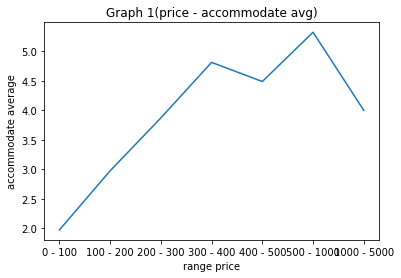

In [7]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

#Total data
Total_data = []
# open the csv file
with open('./airbnb.csv','r') as fileRead:
    i = 0
    # read the data by the line
    while i < 3279:
        # read the data in one line
        lineContent = fileRead.readline()
        # append the data to if the line is not empty and \n
        if(lineContent != '\n') and (lineContent != ''):
            Total_data.append(lineContent.strip('\n').split(','))
        i+=1
        
pf = pd.DataFrame(Total_data)

#index
idx = ['0 - 100', '100 - 200', '200 - 300', '300 - 400', '400 - 500', '500 - 1000', '1000 - 5000']

price_1=[]
price_2=[]
price_3=[]
price_4=[]
price_5=[]
price_6=[]
price_7=[]
total_price = []

for i in range(len(Total_data)):
    # except first row
    if(i == 0):
        i+=1
        continue
    # divide by the range of price
    data_price = int(Total_data[i][9])
    if(data_price < 100):
        price_1.append(Total_data[i])
    elif(data_price < 200):
        price_2.append(Total_data[i])
    elif(data_price < 300):
        price_3.append(Total_data[i])
    elif(data_price < 400):
        price_4.append(Total_data[i])
    elif(data_price < 500):
        price_5.append(Total_data[i])
    elif(data_price < 1000):
        price_6.append(Total_data[i])
    else:
        price_7.append(Total_data[i])
        
total_price.append(price_1)
total_price.append(price_2)
total_price.append(price_3)
total_price.append(price_4)
total_price.append(price_5)
total_price.append(price_6)
total_price.append(price_7)
#print(price_4)
#print(total_price)


# accomodation list
total_acc_list = []
total_bed_list = []
total_rev_list = []
total_neigh_list = []
total_length = []

for j in range(7):
    # accomodation list, bedrooms list, reviews list
    acc_list = []
    bed_list = []
    rev_list = []
    neigh_list = []
    length = 0
    for k in range(len(total_price[j])):
        acc_list.append(int(total_price[j][k][7]))
        if(total_price[j][k][8] != ''):
            bed_list.append(int(total_price[j][k][8]))
        else:
            bed_list.append(0)
        if(total_price[j][k][5] != ''):
            rev_list.append(int(total_price[j][k][5]))
        else:
            rev_list.append(0)
        neigh_list.append(total_price[j][k][4])
        length+=1
    total_acc_list.append(acc_list)
    total_bed_list.append(bed_list)
    total_rev_list.append(rev_list)
    total_neigh_list.append(neigh_list)
    total_length.append(length)


# derive the outputs
# accomodation average
acc_avg = []
# accomodation median
acc_med = []
# bedrooms average
bed_avg = []
# bedrooms median
bed_med = []
# reviews average
rev_avg = []
# reviews median
rev_med = []
# neighbor list
neigh_list = []
for m in range(len(total_neigh_list)):
    neigh_middle = list(set(total_neigh_list[m]))
    neigh_list.append(neigh_middle)
for i in range(len(total_acc_list)):
    acc_avg.append(statistics.mean(total_acc_list[i]))
    acc_med.append(statistics.median(total_acc_list[i]))
    bed_avg.append(statistics.mean(total_bed_list[i]))
    bed_med.append(statistics.median(total_bed_list[i]))
    rev_avg.append(statistics.mean(total_rev_list[i]))
    rev_med.append(statistics.median(total_rev_list[i]))

#print(acc_avg)
#print(acc_med)
#print(bed_avg)
#print(bed_med)
#print(rev_avg)
#print(rev_med)
#print(neigh_list)
#print(total_length)


# make the pd list
df = pd.DataFrame(acc_avg, index = idx, columns = ['accommodates average'])
df['accommodates median'] = acc_med
df['bedrooms average'] = bed_avg
df['bedrooms median'] = bed_med
df['reviews average'] = rev_avg
df['reviews median'] = rev_med
df['neighbor list'] = neigh_list
df['length'] = total_length

#df.to_csv('./sort_ranged_price.csv',mode = 'w')
#df


# x axis : range price
# y axis : accommodate average
plt.plot(idx, acc_avg)
plt.xlabel('range price')
plt.ylabel('accommodate average')
plt.title('Graph 1(price - accommodate avg)')
plt.show()

## 2번

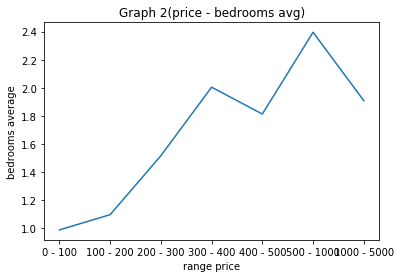

In [9]:
# x axis : range price
# y axis : bedrooms average
plt.plot(idx, bed_avg)
plt.xlabel('range price')
plt.ylabel('bedrooms average')
plt.title('Graph 2(price - bedrooms avg)')
plt.show()

## 3번

In [13]:
import pandas as pd
import numpy as np

#Total data
Total_data = []
# open the csv file
with open('./airbnb.csv','r') as fileRead:
    i = 0
    # read the data by the line
    while i < 3279:
        # read the data in one line
        lineContent = fileRead.readline()
        # append the data to if the line is not empty and \n
        if(lineContent != '\n') and (lineContent != ''):
            Total_data.append(lineContent.strip('\n').split(','))
        i+=1


len_total_data = len(Total_data)
#print(Total_data)
# create the neighborhood array
neighborhood = []

# make a list of needed data
for i in range(len_total_data):
    # except the first row
    if i== 0:
        i += 1
        continue
    # make the tuple object
    neighbor_middle = []
    # neighborhood
    neighbor_middle.append(Total_data[i][4])
    # review
    neighbor_middle.append(Total_data[i][5])
    # overall satisfaction
    neighbor_middle.append(Total_data[i][6])
    # price
    neighbor_middle.append(Total_data[i][9])
    neighborhood.append(neighbor_middle)

#print(neighborhood)
pd_neigh = pd.DataFrame(neighborhood)
#print(pd_neigh)
neighbor_name_list = []

# length of neighborhood list
len_neighborhood = len(neighborhood)
for k in range(len_neighborhood):
    # check the redundancy
    found = False
    for m in range(len(neighbor_name_list)):
        if(neighbor_name_list[m] == neighborhood[k][0]):
            found = True
            break
        m+=1
    if(found == False):
        neighbor_name_list.append(neighborhood[k][0])
    k+=1
        
#print(neighbor_name_list)

# final result list
final_result = [['neighborhood', 'avg of reviews', 'avg of overall_satisfaction', 'avg of price',
               'max of reviews', 'min of reviews', 'max of price', 'min of price']]

for n in range(len(neighbor_name_list)):
    # avg of reviews
    sum_reviews = 0.0
    count_reviews = 0
    # avg of overall_satisfaction
    sum_satis = 0.0
    count_satis = 0
    # avg of price
    sum_price = 0.0
    count_price = 0
    # max of reviews
    max_reviews = 0
    # min of reviews
    min_reviews = 20000000
    # max of price
    max_price = 0
    # min of price
    min_price = 200000000
    for p in range(len(neighborhood)):
        if(neighborhood[p][0] == neighbor_name_list[n]):
            sum_reviews += float(neighborhood[p][1])
            count_reviews += 1
            if(neighborhood[p][2] == ''):
                sum_satis += 0.0
            else:
                sum_satis += float(neighborhood[p][2])
            count_satis += 1
            sum_price += float(neighborhood[p][3])
            count_price += 1
            if(max_reviews < int(neighborhood[p][1])):
                max_reviews = int(neighborhood[p][1])
            if(min_reviews > int(neighborhood[p][1])):
                min_reviews = int(neighborhood[p][1])
            if(max_price < int(neighborhood[p][3])):
                max_price = int(neighborhood[p][3])
            if(min_price > int(neighborhood[p][3])):
                min_price = int(neighborhood[p][3])
    # get the middle info
    middle_info = []
    middle_info.append(neighbor_name_list[n])
    middle_info.append((1.0)*sum_reviews/count_reviews)
    middle_info.append((1.0)*sum_satis/count_satis)
    middle_info.append((1.0)*sum_price/count_price)
    middle_info.append(max_reviews)
    middle_info.append(min_reviews)
    middle_info.append(max_price)
    middle_info.append(min_price)
    final_result.append(middle_info)

pd_result = pd.DataFrame(final_result)
pd_result


,0,1,2,3,4,5,6,7
0,neighborhood,avg of reviews,avg of overall_satisfaction,avg of price,max of reviews,min of reviews,max of price,min of price
1,Jamaica Plain,22.4063,3.17778,140.416,244,0,675,24
2,Back Bay,11.2968,2.69435,237.516,283,0,1372,41
3,Allston,10.314,1.98551,100.019,118,0,550,20
4,Dorchester,25,3.04375,91.575,262,0,395,30
5,East Boston,28.5317,3.44444,115.484,281,0,300,35
6,Beacon Hill,17.8,3.10732,215.907,214,0,849,42
7,Fenway,8.09459,1.90878,218.77,223,0,4000,25
8,Mission Hill,11.3465,1.88119,132.168,385,0,872,27
9,Roxbury,22.8027,3.12585,148.367,154,0,1400,28


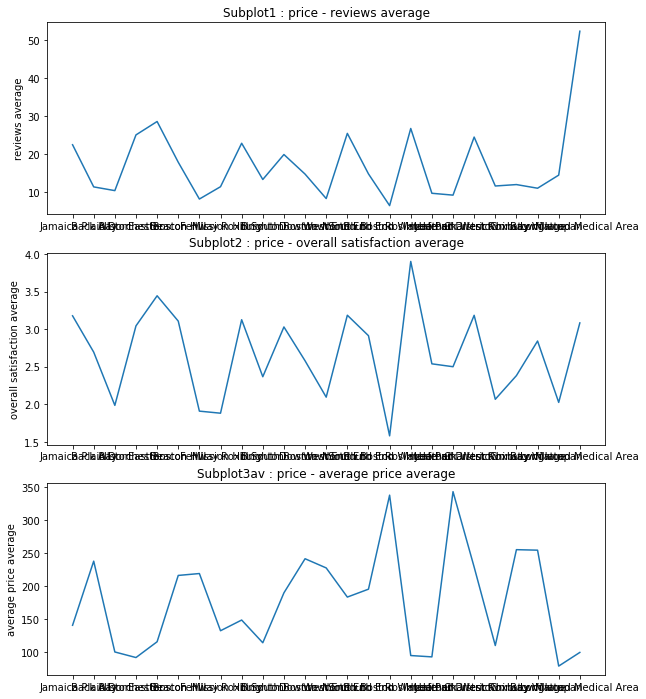

In [25]:
# x axis : neighborhood
# y axis : reviews average
# y axis : overall satisfaction average
# y axis : average prive average

#print(final_result)
rev_avg = []
sat_avg = []
pri_avg = []

for i in range(len(final_result)):
    if(i == 0):
        i+=1
        continue
    rev_avg.append(final_result[i][1])
    sat_avg.append(final_result[i][2])
    pri_avg.append(final_result[i][3])

plt.figure(figsize=(10,12))
plt.subplot(311)
plt.title('Subplot1 : price - reviews average')
plt.ylabel('reviews average')
plt.plot(neighbor_name_list, rev_avg)

plt.subplot(312)
plt.title('Subplot2 : price - overall satisfaction average')
plt.ylabel('overall satisfaction average')
plt.plot(neighbor_name_list, sat_avg)

plt.subplot(313)
plt.title('Subplot3av : price - average price average')
plt.ylabel('average price average')
plt.plot(neighbor_name_list, pri_avg)

